<a href="https://colab.research.google.com/github/rigonzal/ML-2019-1/blob/master/Tarea1/Pregunta3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF-393: Máquinas de Aprendizaje
## Tarea 1 - Pregunta 3
### 26-04-2019


* Rodrigo González - 201303026-2
* Ignacio Valenzuela - 201473055-1


# Introducción

Se usará un dataset respectivo a latidos del corazón para pacientes con cierta condición  el cual debido a su alta dimensionalidad dificulta mucho el análisis. Aquí nace la necesidad de hacer selección de atributos o reducción de estos por medio de una transformación. El objetivo principal será predecir si los pacientes presentan o no tal condición.

# 3. Clasificación

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from google.colab import drive
from sklearn.utils.multiclass import unique_labels

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## 3.a Carga de datos

Se descomprime el dataset para poder utilizarlo desde *Drive*.

In [0]:
!unzip gdrive/My\ Drive/2019-1/ML/Pregunta\ 1/heartbeat.zip | pwd

/content
unzip:  cannot find or open gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip, gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip.zip or gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip.ZIP.


In [0]:
!mv * gdrive/My\ Drive/2019-1/ML/Pregunta\ 1/

mv: target 'gdrive/My Drive/2019-1/ML/Pregunta 1/' is not a directory


Cargamos los datos, se tendrán 2 set de datos separados. El correspondiente las señales cardiacas de personas sin ninguna mala condición cardíaca (*ptbdb_normal.csv*) y el caso contrario (*ptbdb_abnormal.csv*).

In [32]:
data_normal = pd.read_csv("gdrive/My Drive/2019-1/ML/Pregunta 1/ptbdb_normal.csv",names=[i for i in range(188)] )
data_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data_abnormal = pd.read_csv("gdrive/My Drive/2019-1/ML/Pregunta 1/ptbdb_abnormal.csv",names=[i for i in range(188)])
data_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
#Sin condición cardiaca
data_normal['target'] = 0
#Con condición cardiaca
data_abnormal['target'] = 1

In [0]:
data = pd.concat([data_normal,data_abnormal])

Finalmente vemos como queda el dataset concatenado, es decir los pacientes con estado normal arriba y los que si poseen la condición cardíaca abajo.

In [36]:
data

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,target
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
data['target'].value_counts()

1    10506
0     4046
Name: target, dtype: int64

Notamos entonces que las clases están desbalanceadas, ya que no existe la misma cantidad de filas para cada clase.

* **Disparidad magnitudes**

Ahora analizamos la disparidad en las magnitudes entre atributos:

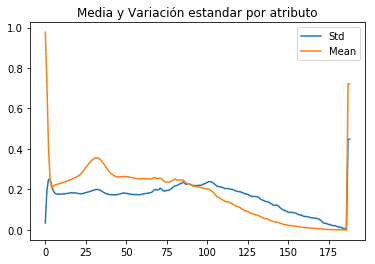

In [38]:
plt.title('Media y Variación estandar por atributo')
_=plt.plot(data.std().values,label='Std')
_=plt.plot(data.mean().values, label = 'Mean')
_ =plt.legend(loc='best')

Notamos que para el primer atributo la media es muy alta, por lo cual se puede considerar normalizar en base a que esa característica pueda afectar el entrenamiento de un modelo.

* **Separación de datos:**

Separamos en la proporción 75% 15% y 10% para los sets de entrenamiento, validación y pruebas respectivamente.

In [0]:
data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
y_pre_train = data_pre_train.pop('target').values
y_pre_val = data_pre_val.pop('target').values
y_pre_test = data_pre_test.pop('target').values

y_pre_train = y_pre_train.reshape(-1,1)
y_pre_val = y_pre_val.reshape(-1,1)
y_pre_test = y_pre_test.reshape(-1,1)

* **Estandarizar**

Por un lado puede ser bueno estandarizar para tener una variación y media iguales entre columnas. Sin embargo se ahorraría el computo de escalar por como viene set de datos, dado que como apreciamos previamente tienen medias y desviaciones estandar muy similares cada atributo.

* **Realizar o no el *shuffle* **

Si no se "barajaban"  los datos totales antes de realizar la división en los sets, se tendrían un desbalance general de clases. Los conjuntos de pruebas y validación habrían quedado solo con la clase con la condición cardiaca, según la proporción que se utilizo para la partición.

## 3.b Correlación

Ahora visualizamos la matriz de correlación a traves de un mapa de calor, donde mientras más claro significará que existe una mayor correlación entre las características.  Es claro que se notará una linea diagional con la claridad máxima, al ser la correlación del atributo con si misma.

In [0]:
data = data.drop(columns=[184,185,186,187])
data_pre_train = data_pre_train.drop(columns=[184,185,186,187])
data_pre_val = data_pre_val.drop(columns=[184,185,186,187])
data_pre_test= data_pre_test.drop(columns=[184,185,186,187])

In [0]:
#Estandarizamos
scaler_x = StandardScaler()
scaler_x.fit(data_pre_train)
x_train = scaler_x.transform(data_pre_train)
x_val = scaler_x.transform(data_pre_val)
x_test = scaler_x.transform(data_pre_test)

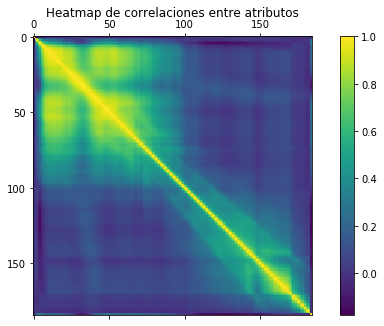

In [42]:
plt.figure(figsize=(10,5))
ax = plt.matshow(data.corr(),fignum=1)
plt.title('Heatmap de correlaciones entre atributos')
_ = plt.colorbar(ax)



Del gráfico podemos inferir que existe  una correlación marcada entre los primeros atributos y que después existe muy poca para los demás.

## 3.c Regresión Logistica

Dado que el *target* es binario, ocupamos este tipo de regresión para variables categóricas:

In [46]:
reg = LogisticRegression(solver = 'liblinear')
reg.fit(data_pre_train, y_pre_train.reshape(len(y_pre_train), ))
score = reg.score(data_pre_val, y_pre_val)
print( "Accuracy del modelo: " + str(score))

Accuracy del modelo: 0.8359303391384051


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 360  234]
 [ 124 1464]]


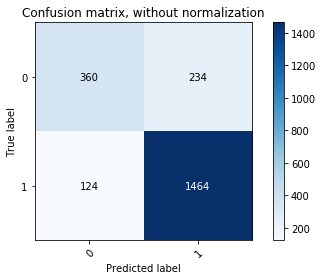

In [45]:
y_hat = reg.predict(data_pre_val)
plot_confusion_matrix(y_pre_val.reshape(len(y_pre_val), ), y_hat, ["0", "1"])

El *score* obtenido representa la exactitud del modelo en la predicción, en este caso correspondería a:

$$Acc = \frac{VP + VN}{VP+FP+VN+FN} = \frac{360+1464}{360+234+124+1464} \approx 0,83 $$

Donde:

* $VP$: Verdaderos positivos, es decir existe la condición y el modelo dice que si.
* $VN$: Verdaderos negativos, es decir no existe la condición y el modelo dice que no.
* $FP$: Falsos positivos, es decir no existe la condición y el modelo dice que si.
* $FN$: Falsos negativos, es decir existe la condición y el modelo dice que no.

Notamos que en el ambito medico, un falso positivo/negativo pueden ocasionar problemas muy graves. La regresión logra un alto *accuracy*.

* **Datos estandarizados**

Probamos con los datos estandarizados para notar si en el *score* existe algún cambio.

In [54]:
reg = LogisticRegression(solver = 'liblinear')
reg.fit(x_train, y_pre_train.reshape(len(y_pre_train), ))
score = reg.score(x_val, y_pre_val)
print( "Accuracy del modelo: " + str(score))

Accuracy del modelo: 0.8395967002749771


Se puede notar una leve mejora en los resultados obtenidos para la exactitud de la predicción. Ahora vemos su matriz de confusión para corroborar:

Confusion matrix, without normalization
[[ 372  222]
 [ 128 1460]]


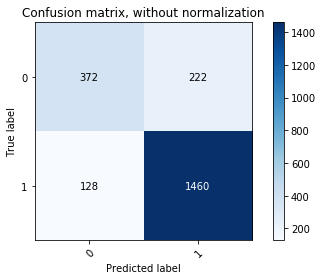

In [55]:
y_hat = reg.predict(x_val)
plot_confusion_matrix(y_pre_val.reshape(len(y_pre_val), ), y_hat, ["0", "1"])

* Se puede ver entonces que los verdaderos negativos disminuyeron, pero aumentaron los verdaderos positivos.

## 3.d Otra métrica



In [56]:
np.mean((np.max(reg.predict_proba(x_val),axis=1)*(reg.predict(x_val)-y_pre_val))**2)

0.2493963283280339